In [3]:
#all Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sea
import datetime as dt


In [7]:
# Read Loan file into a dataframe

loan_df=pd.read_csv(r"loan.csv",low_memory=False)


##  1. Data Cleaning

### Check if there are any header/footer or summary rows and delete them.


In [8]:
loan_df.head() # List the first 10 Rows
print(loan_df.shape)
loan_df.head()

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### From above we can see that we do not have any summary row presents in the header.

In [9]:
loan_df.tail()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### From above bottom rows listing we observe that we dont have any summary rows in footer as well.


In [11]:
### Since we are concerned about the current loan status of the client as we need to relate it to other factors we will take into consideration only charged off and fully paid data.


In [12]:
#check for unique value counts in loan status
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

### Removing rows with loan_status=='Current' as this is an ongoing loan and would not help in decision making for accepting or rejecting new loans

In [13]:
loan_df= loan_df[loan_df['loan_status']!='Current']
print("Row count after deletion:",len(loan_df)) 

Row count after deletion: 38577


### Check for duplicate rows

In [14]:
duplicate_rows = len(loan_df[loan_df.duplicated()])
print("Duplicate rows count:",round(duplicate_rows,2))


Duplicate rows count: 0


### Deleting insignificant columns

### Now we need to look for all columns which have all unique values as it wont make sense to analyse those.

In [23]:

unique_columns = [col for col in loan_df.columns if loan_df[col].nunique() == len(loan_df)]
unique_columns


[]

In [21]:
# We will drop above list of unique columns as it dosent help in analysis
loan_df.drop(['id', 'url','member_id'],axis=1, inplace=True)


In [22]:
loan_df.shape

(38577, 53)

In [15]:
loan_df.shape # current shape of data

(38577, 111)

In [16]:
# Check if columns have null or blank values.
(loan_df.isnull().sum()*100)/len(loan_df)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

### From above output we can conclude that many columns have null or blank values. We can safely remove such columns as they wont play any role in analysis

In [17]:
print("Total columns with values NULL alues: ", len(loan_df.columns[loan_df.isna().all()].tolist()))
na_columns=list(loan_df.columns[loan_df.isna().all()])
print("NA colums List:")
na_columns

Total columns with values NULL alues:  55
NA colums List:


['next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_

In [18]:
# Drop all columns having null values.
loan_df = loan_df.dropna(axis=1, how="all")
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [19]:
# Dropping all rows having all null values.
loan_df = loan_df.dropna(axis=0, how="all")
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


### Now we delete text/description columns as it wont help in analysis

In [25]:
loan_df.drop(columns=['desc','title'],inplace=True)
loan_df.shape

(38577, 51)

In [26]:
# We will limit ourselves to Group level only. 
loan_df = loan_df.drop(['sub_grade'],  axis=1)

In [28]:
#All the below listed columns denote behavioural data and hence wont be available during the approval process hence dhould be discarded for our use case
behavioural_columns=['earliest_cr_line', 'open_acc', 'delinq_2yrs', 'pub_rec', 'revol_util', 'total_acc', 'inq_last_6mths',
                          'out_prncp', 'out_prncp_inv', 'total_pymnt','total_rec_prncp', 'collection_recovery_fee',
                          'total_rec_int', 'revol_bal', 'last_pymnt_amnt','total_pymnt_inv', 'recoveries', 
                        'application_type','last_pymnt_d','last_credit_pull_d','total_rec_late_fee']

loan_df=loan_df.drop(behavioural_columns,axis=1)

In [29]:
# Checking number of unique values in each column
loan_df.nunique().sort_values()

pymnt_plan                        1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
tax_liens                         1
term                              2
loan_status                       2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
addr_state                       50
issue_d                          55
mths_since_last_delinq           95
mths_since_last_record          111
int_rate                        370
zip_code                        822
loan_amnt                       870
funded_amnt                    1019
dti                            2853
annual_inc                     5215
funded_amnt_inv                8050
installment                 

In [30]:
# We can delete all columns having only one unique value as it is of no use to us.
for column in loan_df.columns:
    if loan_df[column].nunique(dropna=True) == 1:
        print(column)
        loan_df = loan_df.drop(column, axis=1)
print("-------------")
loan_df.shape

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens
-------------


(38577, 21)

In [31]:
#Dropping the columns with more than 50% of the values as null.
total_rows = len(loan_df)
for column in loan_df.columns:
    if loan_df[column].isna().mean().round(2) >= 0.50:
        print(column)
        loan_df = loan_df.drop(column, axis=1)
loan_df.shape

mths_since_last_delinq
mths_since_last_record


(38577, 19)

##  2. Data Conversion

In [32]:
#Check typeof each column we may need to clean some data and change the type of column to make it meaningful
loan_df.dtypes


loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [33]:
#We see a lot of object fields we may need to clean them up
loan_df['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [34]:
# Convert term from string to int.
def stripe_term(term):
    return int(term.strip().split()[0])

loan_df['term'] = loan_df['term'].apply(stripe_term)
loan_df['term'].dtype

dtype('int64')

In [35]:
loan_df['term'].value_counts()

36    29096
60     9481
Name: term, dtype: int64

In [36]:

loan_df['int_rate'].value_counts()


10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: int_rate, Length: 370, dtype: int64

In [37]:
# Convert int_rate from string to float.
loan_df['int_rate']=loan_df['int_rate'].str.strip('%').astype(float)


In [38]:
loan_df['int_rate'].value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: int_rate, Length: 370, dtype: int64

In [39]:
# loan_funded_amnt and funded_amnt should be flot64
loan_df = loan_df.astype({'loan_amnt':'float','funded_amnt':'float'})
loan_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,5000.0,5000.0,4975.0,36,10.65,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,5000.0,5000.0,5000.0,36,7.90,156.46,A,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500.0,2500.0,1075.0,36,8.07,78.42,A,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,NaN
39713,8500.0,8500.0,875.0,36,10.28,275.38,C,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,NaN
39714,5000.0,5000.0,1325.0,36,8.07,156.84,A,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,NaN
39715,5000.0,5000.0,650.0,36,7.43,155.38,A,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,NaN


In [41]:
# Rounding off the following columns to two decimals points.
for col in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    loan_df[col] = loan_df[col].apply(lambda x: round(x,2))
    print(loan_df[col])


0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: loan_amnt, Length: 38577, dtype: float64
0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: funded_amnt, Length: 38577, dtype: float64
0         4975.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     1075.0
39713      875.0
39714     1325.0
39715      650.0
39716      800.0
Name: funded_amnt_inv, Length: 38577, dtype: float64
0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64
0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
    

In [42]:
#converting issue_d to date datatype
loan_df['issue_d'] = pd.to_datetime(loan_df.issue_d, format='%b-%y')
loan_df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

## 3. Imputating the rows.


In [44]:
#Checking number of null values in various columns
(loan_df.isnull().sum()*100)/len(loan_df)

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_title               6.185033
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

In [47]:
# Drop null rows for column emp_length and pub_rec_bankruptcies as number of null rows are too few.
loan_df= loan_df[loan_df['emp_length'].notna()]
loan_df= loan_df[loan_df['pub_rec_bankruptcies'].notna()]

In [50]:
(loan_df.isnull().sum()*100)/len(loan_df)

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [49]:
# Since Employee title should also not play a role in deciding the loan eligiblity we can drop it
loan_df=loan_df.drop(['emp_title'], axis=1)

In [51]:
# Strip employment length to have only numeric values
def clean_emp_length(x):
  x=x.strip("years") # No need of years suffix
  x=x.strip("<") # No need of <> sign in employment length
  x=x.replace(" ", "") # Removing spaces
  x=x.replace("+", "") # Removing + 
  return x

loan_df['emp_length']=loan_df['emp_length'].apply(lambda x : clean_emp_length(x) )

In [52]:
print(loan_df['emp_length'])

0        10
1         1
2        10
3        10
5         3
         ..
39562     1
39573     3
39623     8
39666     2
39680     2
Name: emp_length, Length: 36847, dtype: object


## 4. Derived Columns

In [53]:
# Deriving columns by breaking issues date into month and year
loan_df['issue_year']=pd.DatetimeIndex(loan_df['issue_d']).year
loan_df['issue_month']=pd.DatetimeIndex(loan_df['issue_d']).month

count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


<AxesSubplot:>

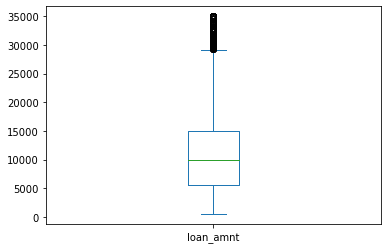

In [54]:
print(loan_df["loan_amnt"].describe())
loan_df['loan_amnt'].plot(kind='box')

## 5. Univariate Analysis

In [57]:
# Column metadata Dict 
column_titles = {
    'issue_y': 'Issue Year',
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'annual_inc': 'Annuap Income',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'dti_b': 'DTI Bins',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
}

In [60]:
# Bucketting Loan Amount as it is easy to analyse categorical data
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'
    else:
        return '15K - above' # 75% quartile

loan_df['loan_amnt_bucket'] = loan_df.apply(lambda x : bucket_loan_amnt(x['loan_amnt']), axis = 1)

In [61]:
# Bucketing dti
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan_df['dti_bucket'] = loan_df.apply(lambda x : bucket_dti(x.dti), axis = 1)

In [62]:
#Bucketing Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

loan_df['annual_inc_bucket'] = loan_df.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

In [63]:
# Bucketing interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan_df['int_rate_bucket'] = loan_df.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)

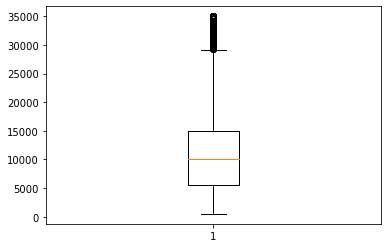

In [65]:
plot.boxplot(loan_df['loan_amnt'],)
plot.show()


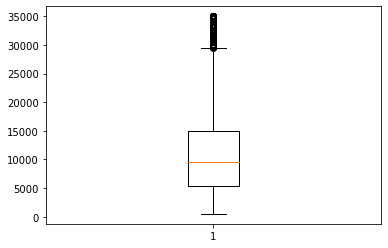

In [66]:
plot.boxplot(loan_df['funded_amnt'])
plot.show()

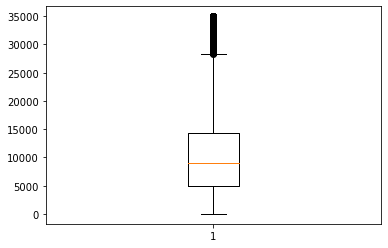

In [67]:
plot.boxplot(loan_df['funded_amnt_inv'])
plot.show()

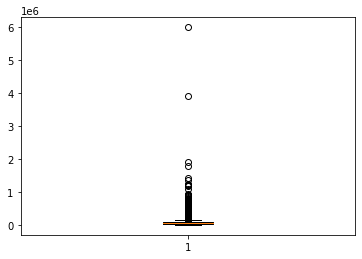

In [68]:
plot.boxplot(loan_df['annual_inc'])
plot.show()

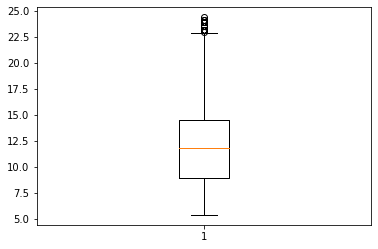

In [69]:
plot.boxplot(loan_df['int_rate'])
plot.show()

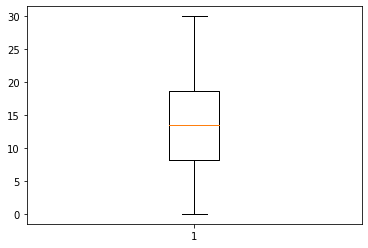

In [70]:
plot.boxplot(loan_df['dti'])
plot.show()

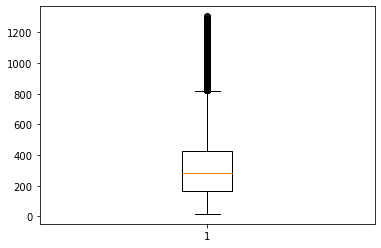

In [71]:
plot.boxplot(loan_df['installment'])
plot.show()

In [74]:
# From above box plts we see outliers for columns'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc'.
# Removing outliers from above columns
outliers_columns_set1= ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']
outliers_columns_set2=['int_rate', 'installment', 'annual_inc']
# Define a function to remove outliers based on IQR
def remove_outliers_iqr(data, columns,threshold):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Remove outliers from the DataFrame normally we consider +-1.5 times of lower and upper quartile as outlier
loan_df =remove_outliers_iqr(loan_df, outliers_columns_set1,1.5)
loan_df =remove_outliers_iqr(loan_df, outliers_columns_set2,1.5)



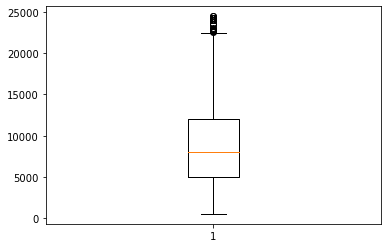

In [75]:
plot.boxplot(loan_df['loan_amnt'])
plot.show()

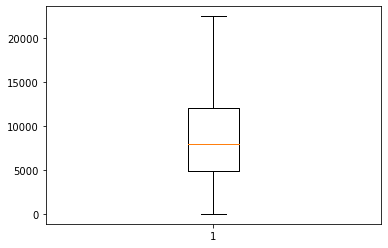

In [76]:
plot.boxplot(loan_df['funded_amnt_inv'])
plot.show()

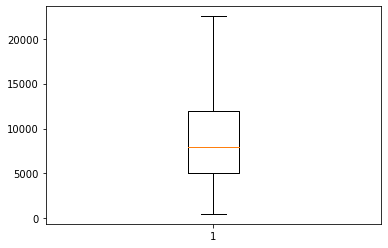

In [77]:
plot.boxplot(loan_df['funded_amnt'])
plot.show()

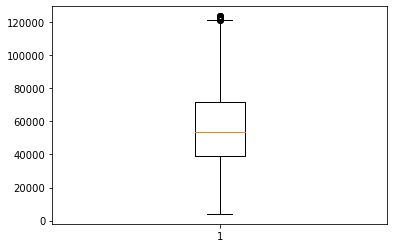

In [78]:
plot.boxplot(loan_df['annual_inc'])
plot.show()

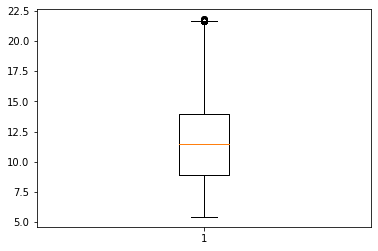

In [79]:
plot.boxplot(loan_df['int_rate'])
plot.show()

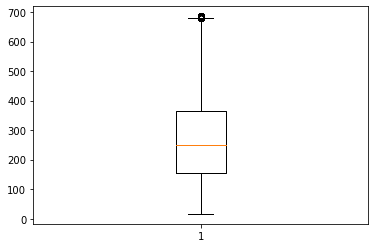

In [80]:
plot.boxplot(loan_df['installment'])
plot.show()

In [86]:
# Univarients function
def plot_digram(df, column):
    fig, p = plot.subplots(1,2, figsize=(20, 5))
    sea.histplot(df.loc[df[column].notnull(), column], kde=True, ax=p[0])
    sea.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plot.tight_layout()
    plot.show()

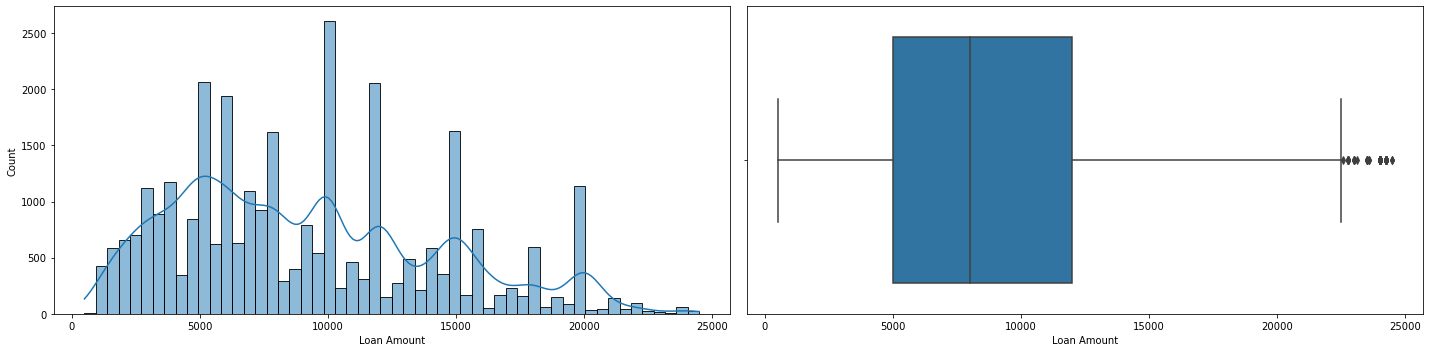

count    31045.000000
mean      9167.771783
std       5127.962720
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12000.000000
max      24500.000000
Name: loan_amnt, dtype: float64

In [87]:
plot_digram(loan_df, 'loan_amnt')
loan_df['loan_amnt'].describe()

In [88]:
# observation:
# Most of the loan amount applied were in the range of 5k-13k.
# Maximum Loan amount applied was ~25k.

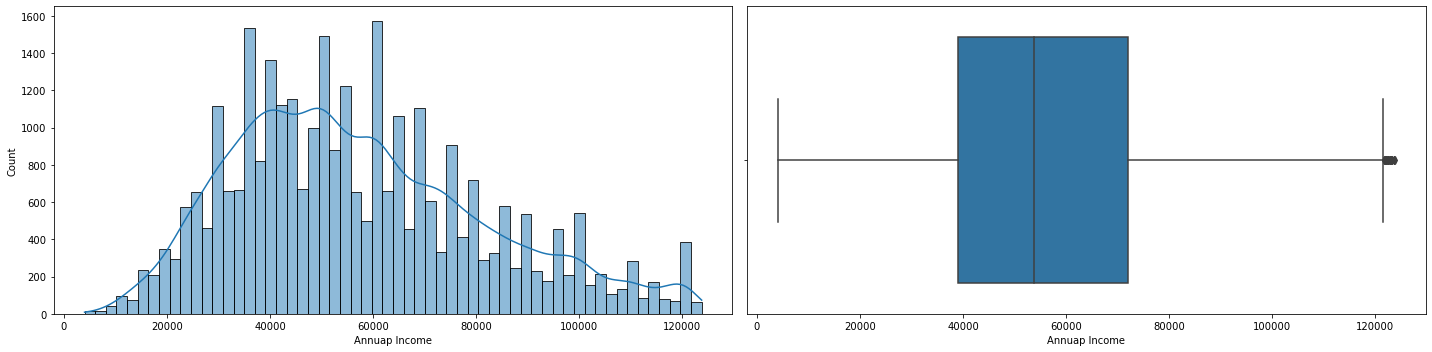

count     31045.000000
mean      57174.848373
std       24356.318319
min        4000.000000
25%       39000.000000
50%       53800.000000
75%       72000.000000
max      123735.000000
Name: annual_inc, dtype: float64

In [89]:
plot_digram(loan_df, 'annual_inc')
loan_df['annual_inc'].describe()

In [90]:
# The Annual income of most if applicants lies between 39k-73k.
print("Average Anual Income is :", round(loan_df['annual_inc'].mean(),0))

Average Anual Income is : 57175.0


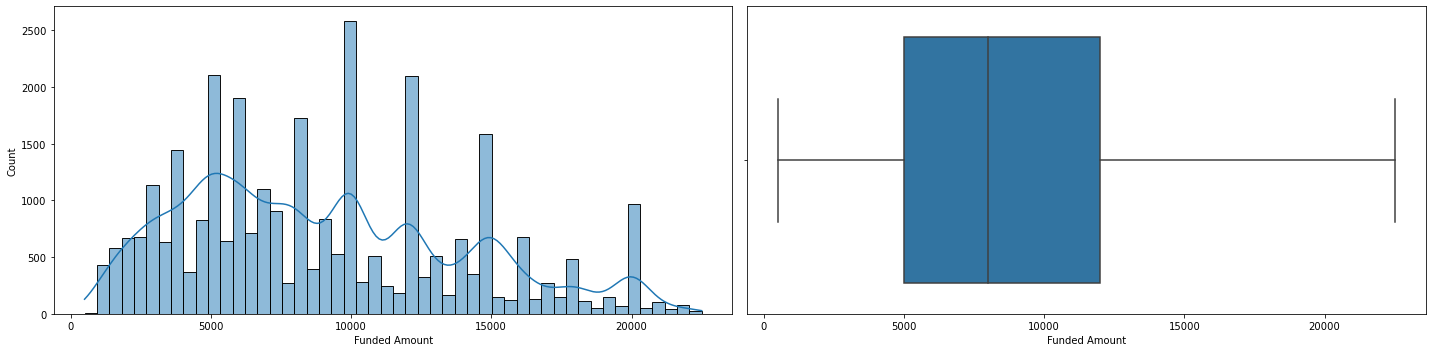

count    31045.000000
mean      8994.954904
std       4957.766515
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12000.000000
max      22500.000000
Name: funded_amnt, dtype: float64

In [91]:
plot_digram(loan_df, 'funded_amnt')
loan_df['funded_amnt'].describe()

In [92]:
# Maximum funded amount is 22500
# Most funded amounts are in range 5K-13K

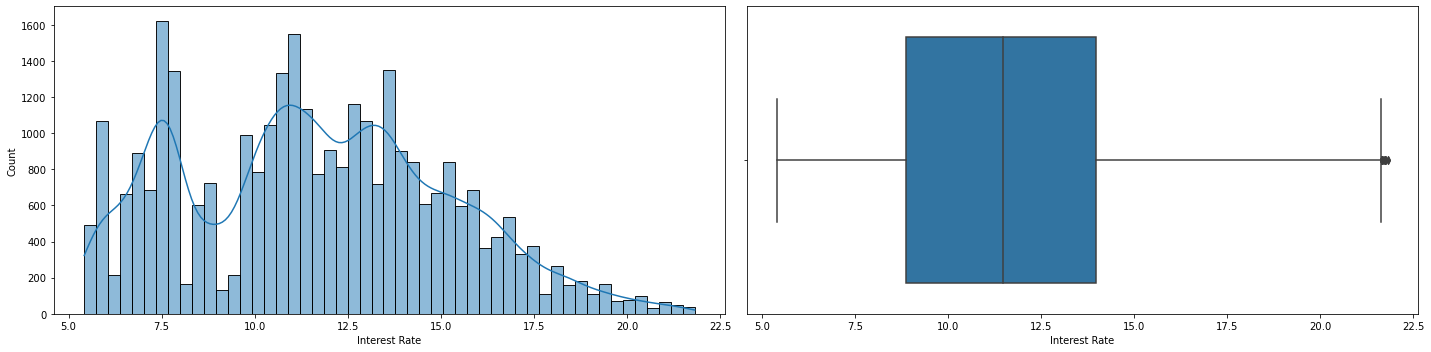

count    31045.000000
mean        11.644664
std          3.524588
min          5.420000
25%          8.880000
50%         11.490000
75%         13.990000
max         21.820000
Name: int_rate, dtype: float64

In [93]:
plot_digram(loan_df, 'int_rate')
loan_df['int_rate'].describe()

In [77]:
# Rate of intrest for most applicants is  8%-14%.
# Average Rate of interest of rate is 11.7 %

### Unordered Categorical Variable Analysis

<AxesSubplot:>

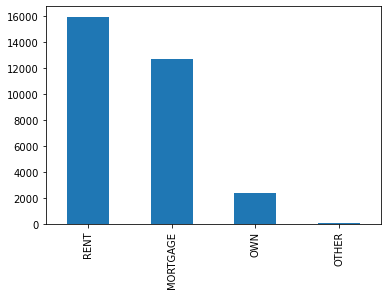

In [94]:
loan_df['home_ownership'].value_counts().plot.bar()

In [95]:
# Majority of loan applicants are either living on Rent or on Mortgage

<AxesSubplot:>

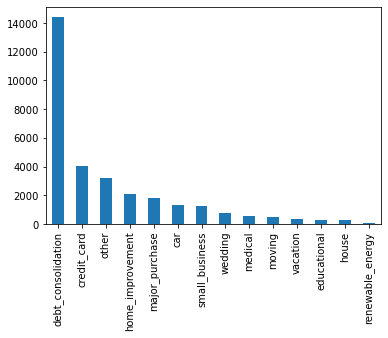

In [96]:
loan_df['purpose'].value_counts().plot.bar()

In [97]:
# Most of the loan applicants are for debt_consolidations.

In [98]:
Failed_per_houseowner_ship=loan_df
Failed_per_houseowner_ship["loan_status"].value_counts()

Fully Paid     26721
Charged Off     4324
Name: loan_status, dtype: int64

<AxesSubplot:>

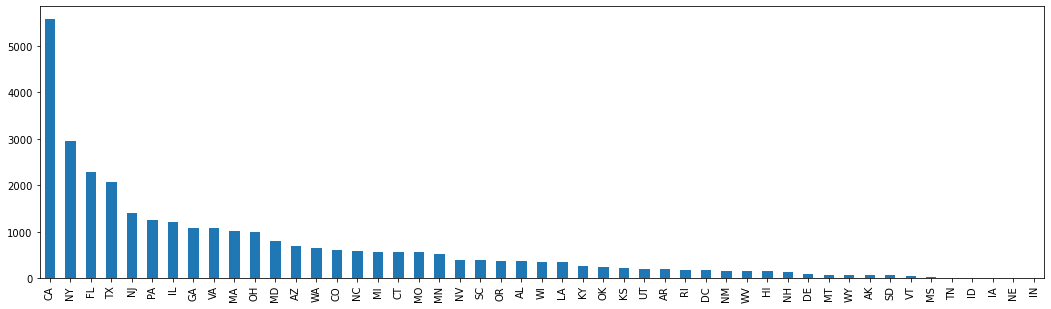

In [107]:
loan_df['addr_state'].value_counts().plot.bar(figsize=(18,5))

In [108]:
# Most of the Loan applicants are from CA(State).

#### 5.3 Ordered Categorical Variable Analysis

<AxesSubplot:ylabel='emp_length'>

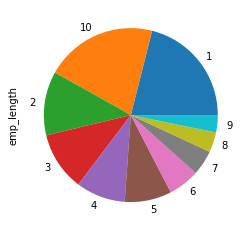

In [109]:
loan_df['emp_length'].value_counts().plot(kind="pie")

In [110]:
# Most of the applications are having 10+ yrs of Exp.

## 6.  Bivariate Analysis

In [115]:
#Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan = loan_df.groupby(['annual_inc_bucket', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off']+ inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_bucket,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0 - 40k,1559,7309,8868,0.175801
2,50k to 60k,733,4294,5027,0.145813
1,40k - 50k,767,4522,5289,0.145018
3,60k to 70k,433,3110,3543,0.122213
4,70k to 80k,346,2581,2927,0.118210
5,80k - above,486,4905,5391,0.090150


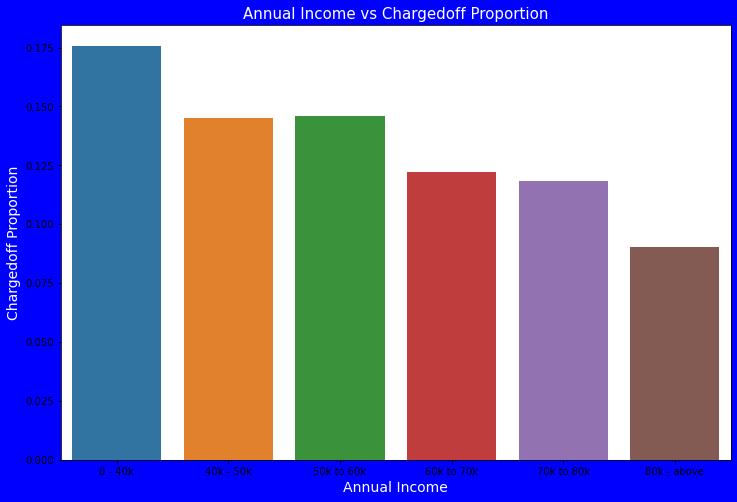

In [116]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sea.barplot(x='annual_inc_bucket', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plot.show()

In [117]:
#Bivariate Analysis on Intrest rate  against Chargedoff_Proportion -

interest_vs_loan = loan_df.groupby(['int_rate_bucket', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off']+ interest_vs_loan['Fully Paid']
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,int_rate_bucket,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1449,4176,5625,0.257600
0,High,911,4480,5391,0.168985
2,Moderate,905,5315,6220,0.145498
1,Low,553,4779,5332,0.103713
4,Very Low,506,7971,8477,0.059691


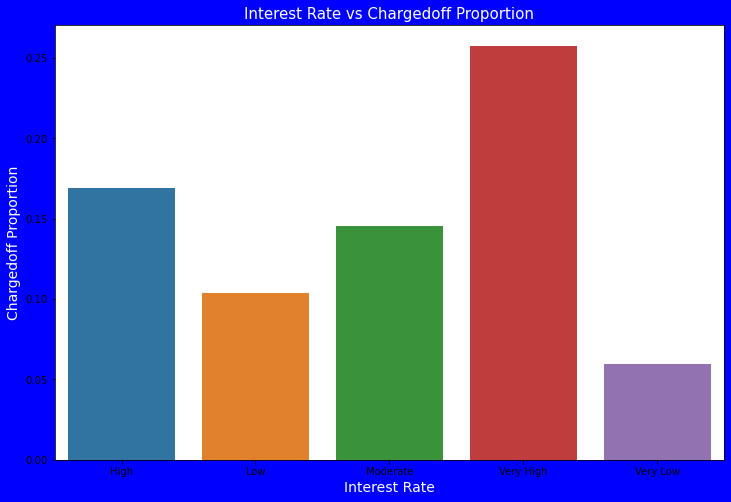

In [119]:
## plot the diagram.
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='int_rate_bucket', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.show()

# Observations:
# interest rate less than 10% or very low has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% or very high has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.


Another inference form the houseowner variable those who are not owning the house are most likely to be charged off.

In [120]:
#Bivariate Analysis of Home Ownership against Chargedoff_Proportion -

home_ownership_vs_loan = loan_df.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off']+ home_ownership_vs_loan['Fully Paid']
home_ownership_vs_loan['Chargedoff_Proportion'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']
home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,OTHER,16,69,85,0.188235
3,RENT,2338,13581,15919,0.146869
2,OWN,333,2030,2363,0.140923
0,MORTGAGE,1637,11041,12678,0.129121


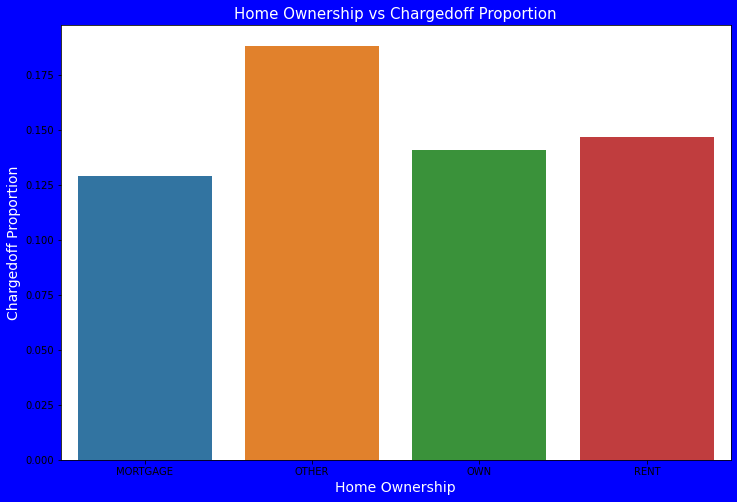

In [121]:

fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Home Ownership vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='home_ownership', y='Chargedoff_Proportion', data=home_ownership_vs_loan)
ax1.set_xlabel('Home Ownership',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.show()

In [122]:
# observation:
# Those who are not owning the home is having high chances of loan defaults.

In [123]:
#Bivariate Analysis on Purpose of loan against Chargedoff_Proportion -

purpose_vs_loan = loan_df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off']+ purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,322,912,1234,0.260940
10,renewable_energy,15,64,79,0.189873
3,educational,46,232,278,0.165468
5,house,45,232,277,0.162455
7,medical,91,487,578,0.157439
9,other,505,2734,3239,0.155912
8,moving,74,410,484,0.152893
12,vacation,48,274,322,0.149068
2,debt_consolidation,2111,12305,14416,0.146435
4,home_improvement,249,1858,2107,0.118178


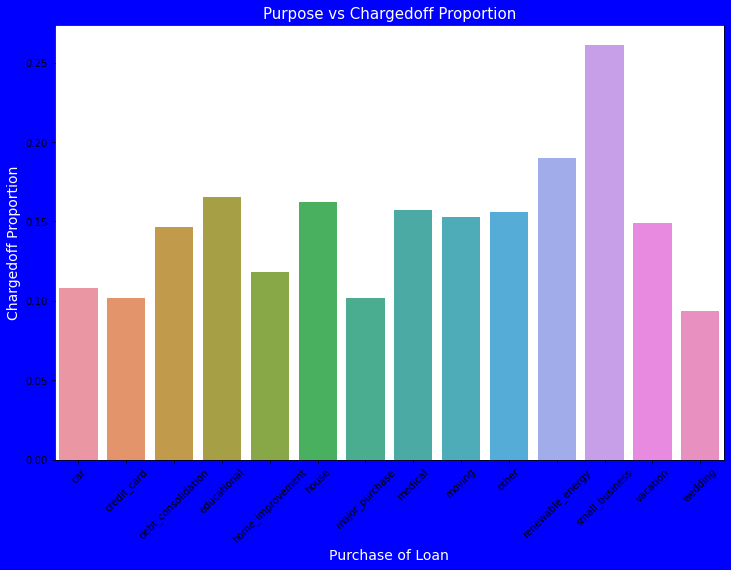

In [124]:
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Purpose vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='purpose', y='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_xlabel('Purchase of Loan',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

In [125]:
#1. Those applicants who is having home loan is having low chances of loan defaults.
#2. Those applicants having loan for small bussiness is having high chances for loan defaults.

In [126]:
#Bivariate Analysis on DTI against Chargedoff_Proportion -

dti_vs_loan = loan_df.groupby(['dti_bucket', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan['Total'] = dti_vs_loan['Charged Off']+ dti_vs_loan['Fully Paid']
dti_vs_loan['Chargedoff_Proportion'] = dti_vs_loan['Charged Off'] / dti_vs_loan['Total']
dti_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,dti_bucket,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,965,5097,6062,0.159188
0,High,873,4801,5674,0.153860
2,Moderate,889,5399,6288,0.141380
1,Low,720,4963,5683,0.126694
4,Very Low,877,6461,7338,0.119515


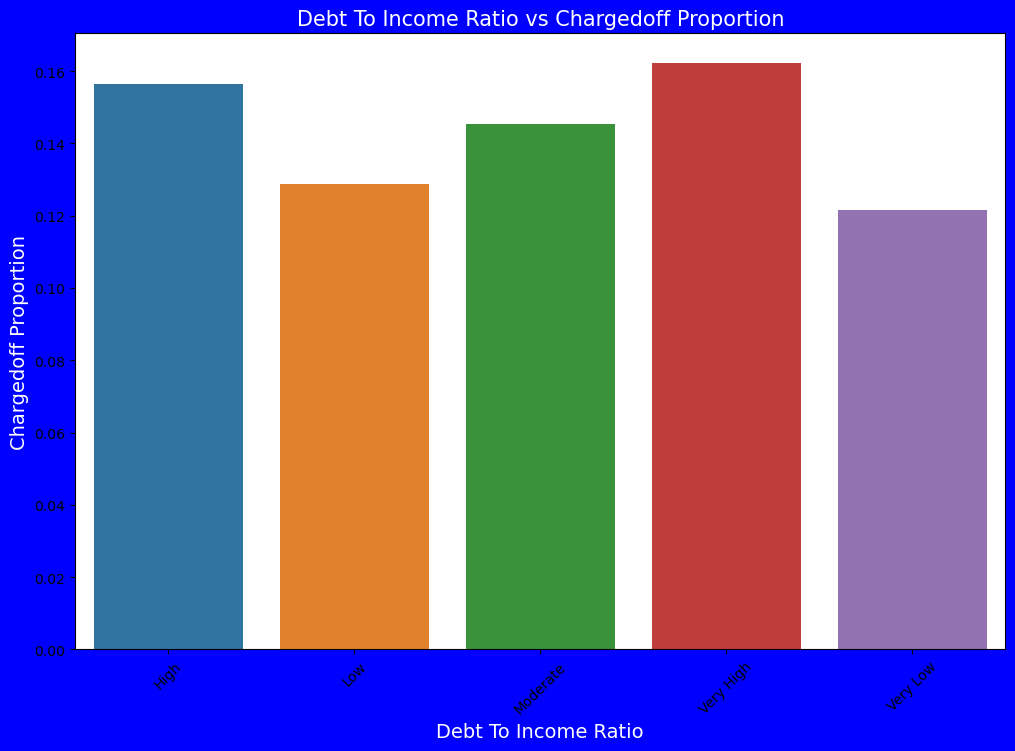

In [98]:
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Debt To Income Ratio vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='dti_b', y='Chargedoff_Proportion', data=dti_vs_loan)
ax1.set_xlabel('Debt To Income Ratio',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

In [128]:
# Observation:
#1.High DTI value  having high risk of defaults
#2 Lower the DTI having low chances loan defaults.

In [129]:
loan_df['pub_rec_bankruptcies'].value_counts()

0.0    29671
1.0     1369
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

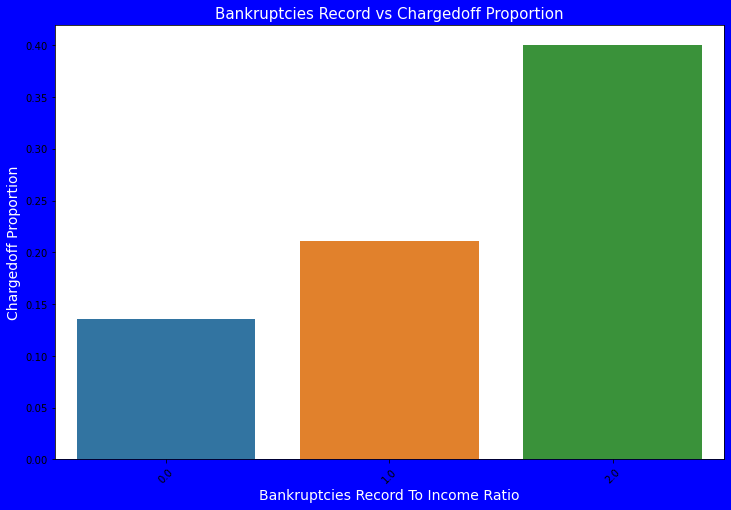

In [130]:
# #Bivariate Analysis on Bankruptcies Record against Chargedoff_Proportion -
pub_rec_bankruptcies_vs_loan = loan_df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_vs_loan['Total'] = pub_rec_bankruptcies_vs_loan['Charged Off']+ pub_rec_bankruptcies_vs_loan['Fully Paid']
pub_rec_bankruptcies_vs_loan['Chargedoff_Proportion'] = pub_rec_bankruptcies_vs_loan['Charged Off'] / pub_rec_bankruptcies_vs_loan['Total']
pub_rec_bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Bankruptcies Record vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=pub_rec_bankruptcies_vs_loan)
ax1.set_xlabel('Bankruptcies Record To Income Ratio',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

In [131]:
# Observations:
# 1.Bankruptcies Record with 2 is having high impact on loan defaults
# 2.Bankruptcies Record with 0 is low impact on loan defaults
# 3.Lower the Bankruptcies lower the risk.

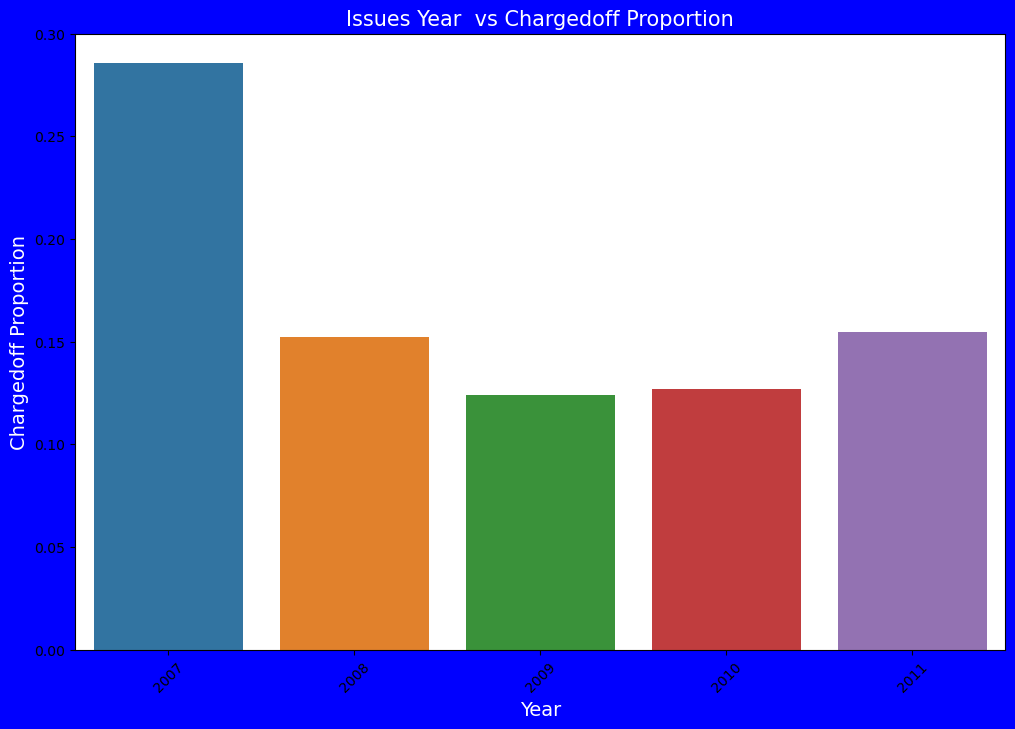

In [103]:
# Bivariate Analysis on Issues of Year  against Chargedoff_Proportion -

issue_year_vs_loan = loan_df.groupby(['issue_year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_year_vs_loan['Total'] = issue_year_vs_loan['Charged Off']+ issue_year_vs_loan['Fully Paid']
issue_year_vs_loan['Chargedoff_Proportion'] = issue_year_vs_loan['Charged Off'] / issue_year_vs_loan['Total']
issue_year_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Issues Year  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='issue_year', y='Chargedoff_Proportion', data=issue_year_vs_loan)
ax1.set_xlabel('Year',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

In [104]:
    # Year 2007 is highest loan defaults this may have to do with recession in 2007.
    # 2009 is having lowest loan defaults recession was at its end in this year.


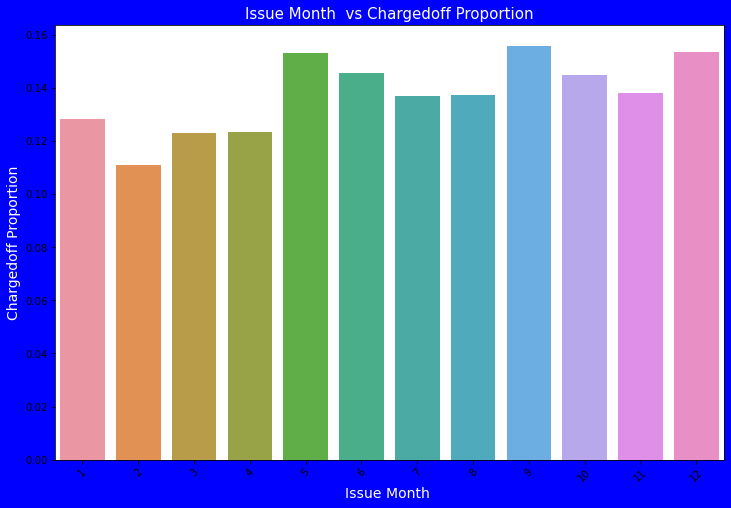

In [132]:
# Bivariate Analysis on Month of Issue of loan Record against Chargedoff_Proportion -

issue_month_vs_loan = loan_df.groupby(['issue_month', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_month_vs_loan['Total'] = issue_month_vs_loan['Charged Off']+ issue_month_vs_loan['Fully Paid']
issue_month_vs_loan['Chargedoff_Proportion'] = issue_month_vs_loan['Charged Off'] / issue_month_vs_loan['Total']
issue_month_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Issue Month  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='issue_month', y='Chargedoff_Proportion', data=issue_month_vs_loan)
ax1.set_xlabel('Issue Month ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

In [133]:
# 1. Those loan has been issued in May, September and december is having high number of loan defaults
# 2. Those loan has been issued in month of February is having high number of loan defaults
# 3. Majority of loan defaults coming from applicants whose loan has been aprroved from September-to Deceber 
# 4. This may have to do with the high workloads of issuing authorities or trying to meet targets in these months

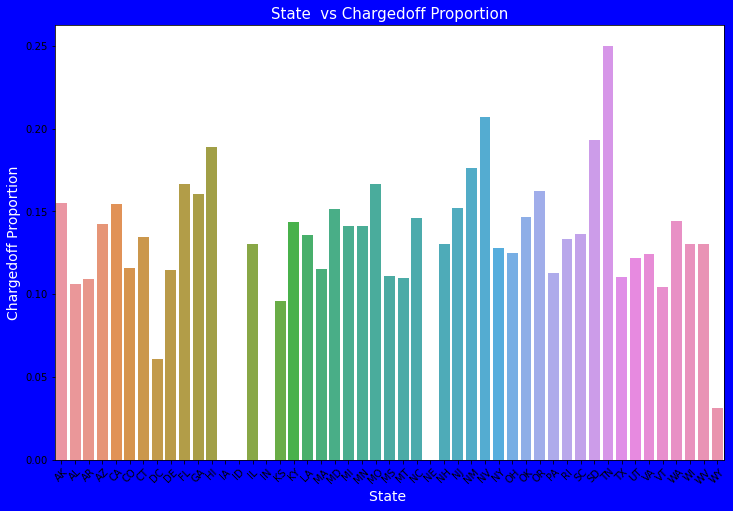

In [134]:
# Bivariate Analysis on Address state  against Chargedoff_Proportion -

addr_state_vs_loan = loan_df.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan['Total'] = addr_state_vs_loan['Charged Off']+ addr_state_vs_loan['Fully Paid']
addr_state_vs_loan['Chargedoff_Proportion'] = addr_state_vs_loan['Charged Off'] / addr_state_vs_loan['Total']
addr_state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# graph
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('State  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='addr_state', y='Chargedoff_Proportion', data=addr_state_vs_loan)
ax1.set_xlabel('State ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

In [135]:
# Observations:
# 1.DE States is holding highest number of loan defaults.
# 2.CA is having low number of loan defaults, may have to do with better laws and good income

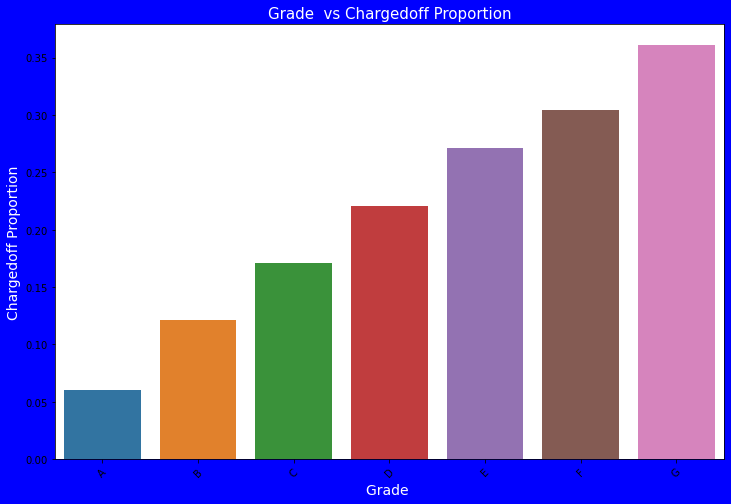

In [136]:
# Bivariate Analysis on Grade against Chargedoff_Proportion -

grade_vs_loan = loan_df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off']+ grade_vs_loan['Fully Paid']
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Grade  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grade ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

In [137]:
    # observations :
    #1. The Loan applicants with loan Grade G is having higest Loan Defaults.
    #2. The Loan applicants with loan A is having lowest Loan Defaults.

## 7.  Correlation Analysis

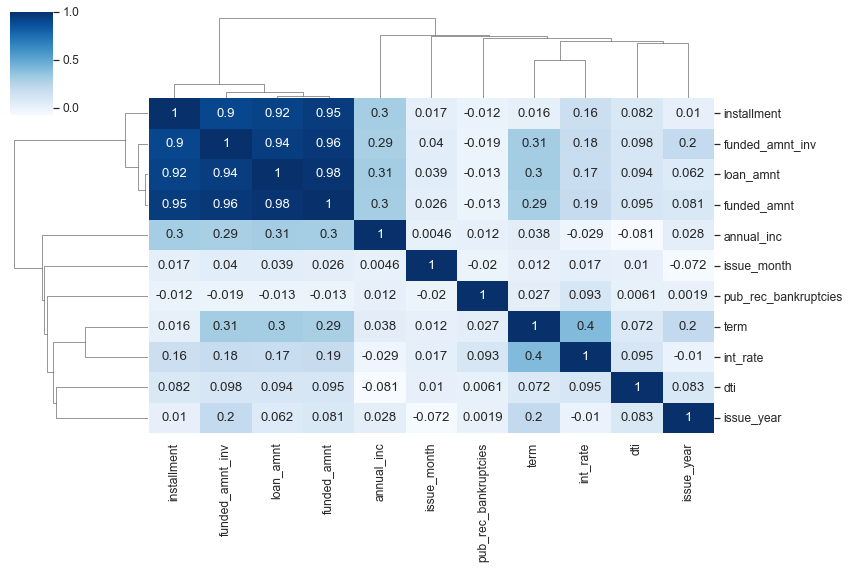

In [140]:
corr_loan = loan_df
corr = corr_loan.corr()
sea.set(font_scale=1.1)
sea.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plot.show()


In [142]:
drop_columns = ['installment', 'issue_year', 'issue_month']
corr_loan = corr_loan.drop(columns=drop_columns)

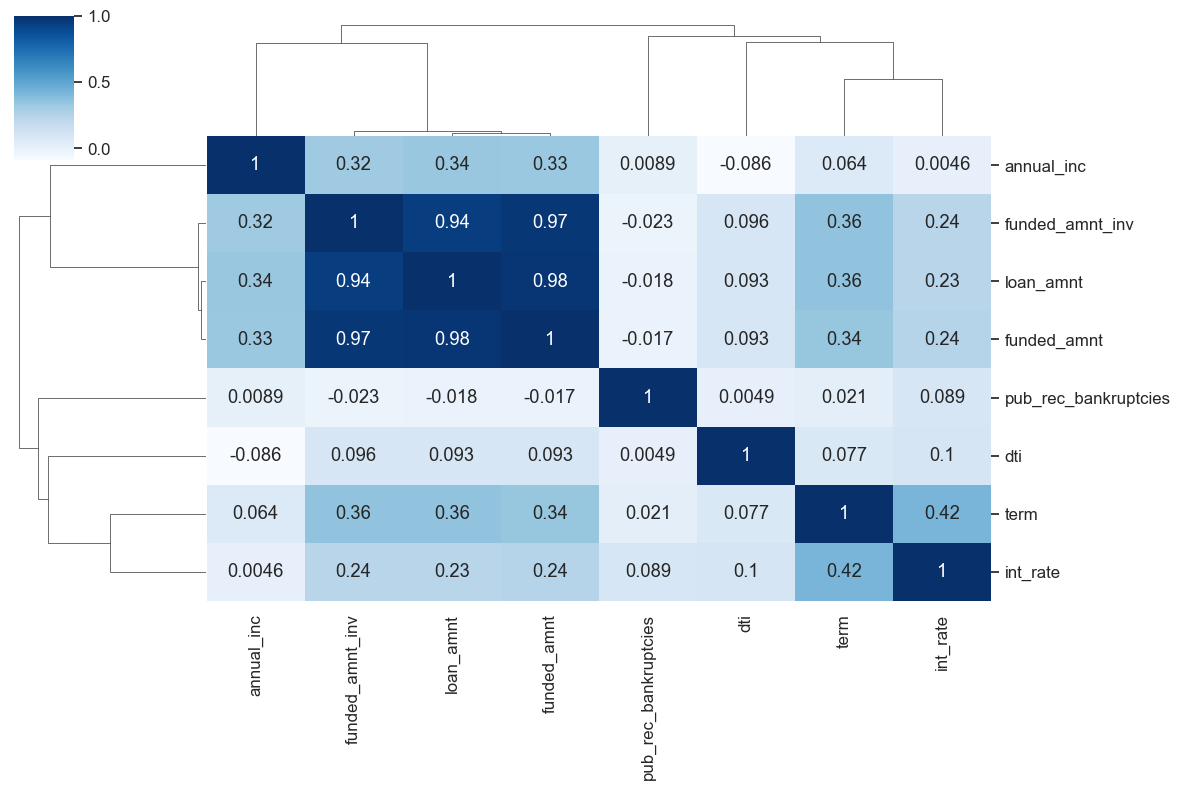

In [113]:
corr = corr_loan.corr()
sea.set(font_scale=1.1)
sea.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plot.show()

Negative Correlation:

1.loan_amnt has negative correlation with pub_rec_bankrupticies

2.annual income has a negative correlation with dti

Strong Correlation:

1.term has a strong correlation with loan amount

2.term has a strong correlation with interest rate

3.annual income has a strong correlation with loan_amount